In [1]:
import sys

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import *
from os import path
from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib.lines import Line2D

In [2]:
ica_data = load_json_model(os.path.join('..','data','cgu.json.gz'))

In [3]:
ica_data.sample_table.to_csv(os.path.join('..','data','sample.csv'))

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


Text(35.472222222222214, 0.5, 'iModulon Activity:Anaerobiosis')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


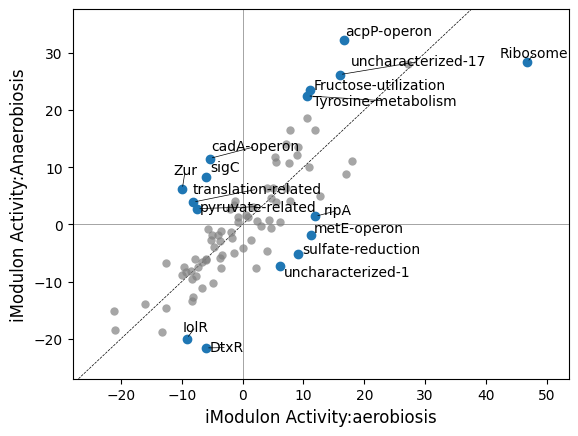

In [4]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-13h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-13h-2-Stuttgart",table=True,threshold=10)
dima.set_xlabel("iModulon Activity:aerobiosis",fontsize=12)
dima.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)

Text(35.472222222222214, 0.5, 'iModulon Activity:Microaerobic')

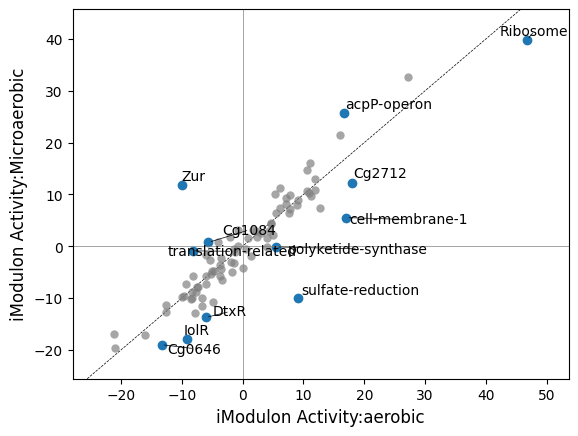

In [5]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-9h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-7h-2-Stuttgart",table=True,threshold=5.5)
dima.set_xlabel("iModulon Activity:aerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Microaerobic",fontsize=12)

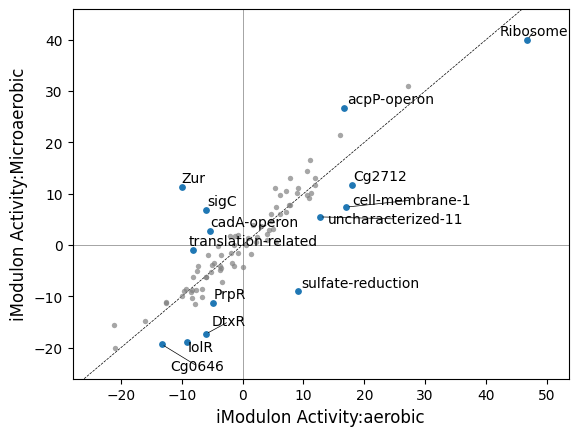

In [6]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-9h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))
dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-9h-2-Stuttgart",table=True,threshold=6,show_labels="auto",scatter_kwargs={'s':15})
dima.set_xlabel("iModulon Activity:aerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Microaerobic",fontsize=12)
plt.show()

Text(35.472222222222214, 0.5, 'iModulon Activity:Anaerobic')

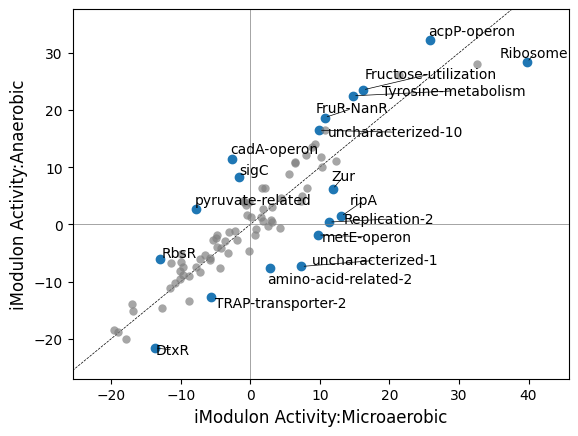

In [7]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-7h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-13h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-7h-2-Stuttgart","altering-oxygen:JL-13h-2-Stuttgart",table=True,threshold=5.5)
dima.set_xlabel("iModulon Activity:Microaerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Anaerobic",fontsize=12)

                      difference    pvalue    qvalue
Zur                    21.188237  0.000203  0.007084
sigC                   12.897311  0.000331  0.007084
acpP-operon            10.128338  0.005074  0.025966
cadA-operon             8.159172  0.001686  0.014667
translation-related     7.215440  0.000932  0.009014
NrtR                    5.781303  0.002098  0.016592
Replication-3           5.654153  0.007989  0.033099
Fructose-utilization    5.529660  0.003233  0.021635
uncharacterized-17      5.504078  0.026350  0.069468
uncharacterized-10      5.330689  0.034792  0.086484
Cg0646                 -6.010081  0.011687  0.044209
PrpR                   -6.331208  0.045274  0.094121
Cg2712                 -6.357585  0.021653  0.062795
Ribosome               -6.820861  0.044272  0.094121
uncharacterized-11     -7.207204  0.006844  0.033081
cell-membrane-1        -9.671534  0.000677  0.008415
IolR                   -9.723188  0.014343  0.048077
DtxR                  -11.306377  0.000872  0.

([], [])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


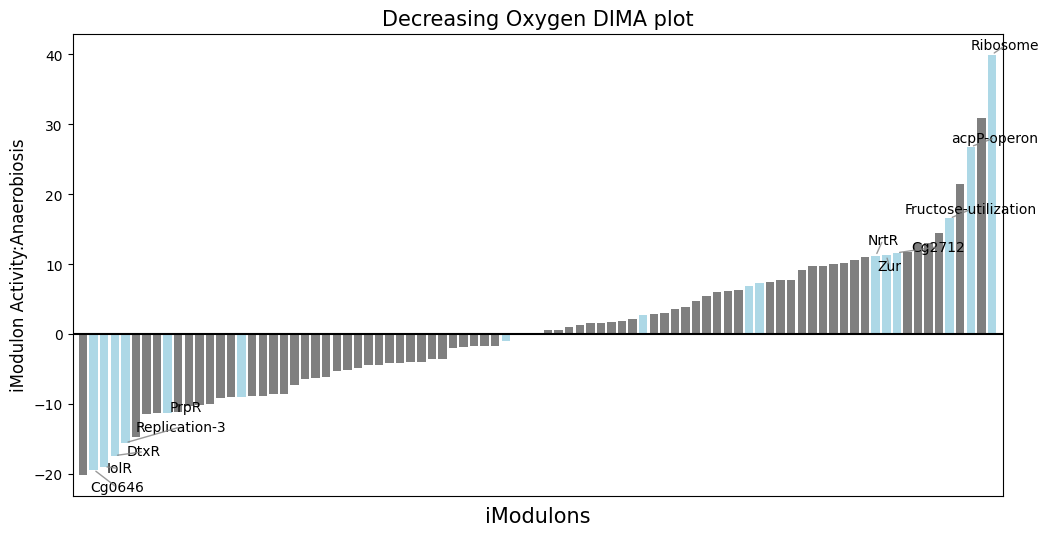

In [8]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "altering-oxygen:JL-3h-2-Stuttgart"
diff_condition = "altering-oxygen:JL-9h-2-Stuttgart"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

                           difference        pvalue        qvalue
Zur                         20.475340  2.273804e-04  3.297016e-03
HutC                        12.169084  7.394085e-14  6.432854e-12
Cg1084                      11.514221  5.360831e-04  5.182137e-03
sulfate-reduction            9.348027  8.365514e-03  3.611568e-02
Fructose-utilization         8.975223  9.765512e-04  8.495996e-03
TcsR                         8.111791  9.574384e-10  2.776571e-08
polyketide-synthase          7.815205  1.151129e-02  3.993595e-02
uncharacterized-15           6.980092  2.550826e-02  5.690305e-02
cell-membrane-1              6.388319  2.248547e-03  1.630196e-02
PcaO                         6.299818  4.490045e-04  4.882924e-03
sigD-operon                  6.250462  3.192299e-03  1.983786e-02
Cg2712                       5.975836  2.407506e-02  5.512162e-02
FruR-NanR                    5.924553  1.193488e-02  3.993595e-02
Tyrosine-metabolism          5.201476  1.377752e-02  4.088022e-02
acpP-opero

([], [])

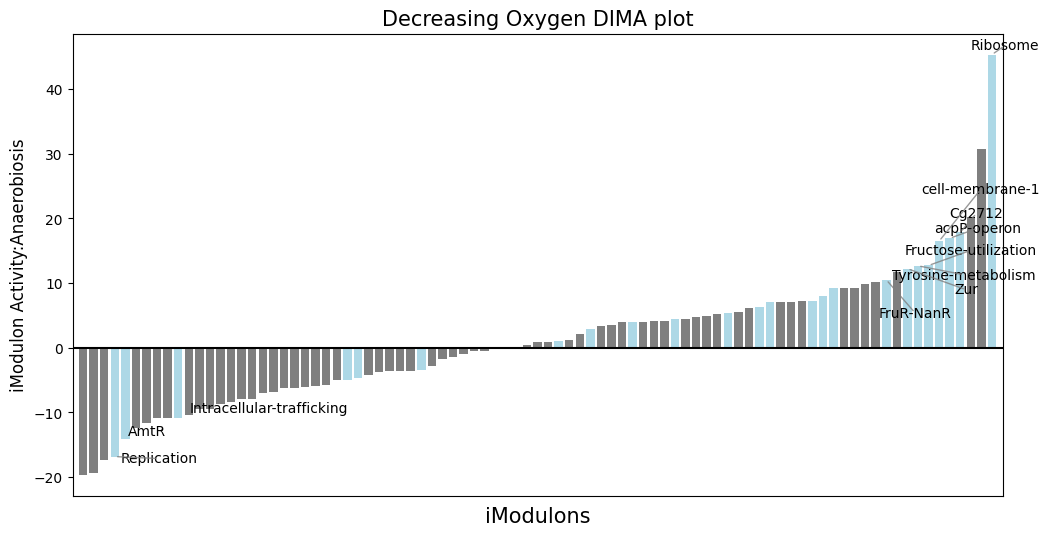

In [9]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "differing-in-growth-rates-lackP:P2_R1_T1_p"
diff_condition = "differing-in-growth-rates-lackP:P4-R1-T28_p"
threshold = 4

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

                     difference        pvalue        qvalue
Zur                   20.684885  2.197391e-04  4.779326e-03
Cg1084                10.677074  6.546454e-04  8.136307e-03
TcsR                   8.875029  3.442527e-10  1.497499e-08
HutC                   7.254921  2.675816e-10  1.497499e-08
SG_9                   6.323937  5.058886e-03  3.182349e-02
acpP-operon            5.401911  1.532064e-02  5.795199e-02
Signal-transduction   -6.063898  1.039797e-02  4.644624e-02
Ribosome              -8.381130  3.516626e-02  8.051224e-02
NrtR                 -10.020936  3.940994e-04  6.857329e-03


([], [])

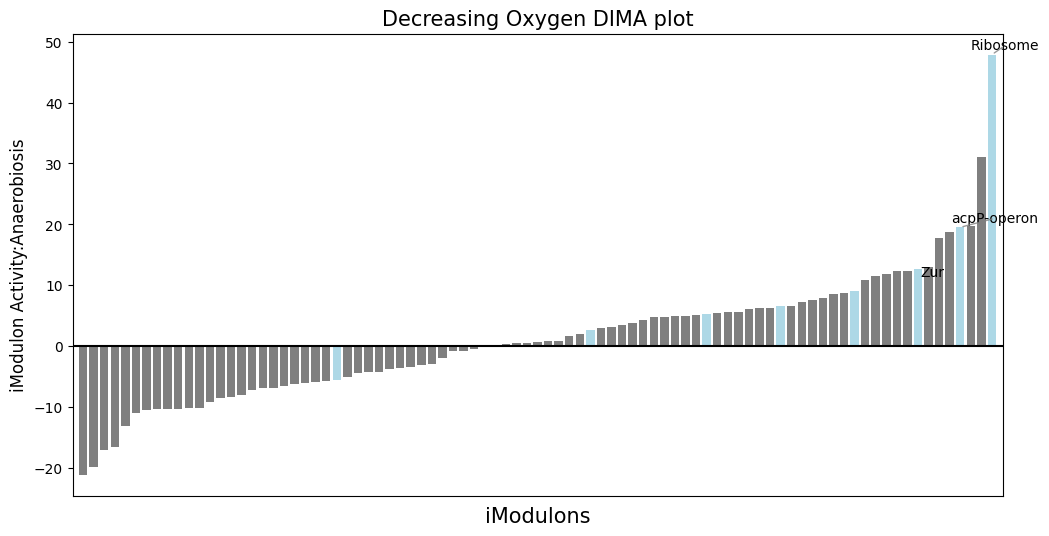

In [10]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "differing-in-growth-rates-lackP:P2_R1_T3_p"
diff_condition = "differing-in-growth-rates-lackP:P3-R1-T26_p"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

In [11]:
activity_data

Replication-3        -21.143257
uncharacterized-12   -19.903718
Replication          -17.098441
Cg0646               -16.622051
AmtR                 -13.089519
                        ...    
Cg2712                18.789895
acpP-operon           19.497570
uncharacterized-17    19.755426
uncharacterized-15    31.114783
Ribosome              47.886107
Length: 87, dtype: float64

In [12]:
time_groups = ica_data.sample_table.groupby(["project","condition"])
time_projects = {}
for i, j in time_groups:
    if 'altering-oxygen' in i[0]:
        time_projects.update({i:list(j.index)})
print(time_projects)
time_points = [3,5,7,9,11,13]
oxygen = []
hypoxia_A = pd.DataFrame(index=ica_data.A.index)
print(time_projects)
for i,j in time_projects.items():
    oxygen.append(j[0])
    hypoxia_A[i[0]+":"+i[1]] = ica_data.A[j].mean(axis=1)
    
hypoxia_A["mean"] =  abs(hypoxia_A.mean(axis=1))
hypoxia_A = hypoxia_A.sort_values("mean",ascending=False)
hypoxia_A.drop(columns="mean",inplace=True)

hypoxia_A



{('altering-oxygen', 'JL-11h-2-Stuttgart'): ['ERR2401413'], ('altering-oxygen', 'JL-13h-2-Stuttgart'): ['ERR2401414'], ('altering-oxygen', 'JL-3h-2-Stuttgart'): ['ERR2401409'], ('altering-oxygen', 'JL-5h-2-Stuttgart'): ['ERR2401410'], ('altering-oxygen', 'JL-7h-2-Stuttgart'): ['ERR2401411'], ('altering-oxygen', 'JL-9h-2-Stuttgart'): ['ERR2401412']}
{('altering-oxygen', 'JL-11h-2-Stuttgart'): ['ERR2401413'], ('altering-oxygen', 'JL-13h-2-Stuttgart'): ['ERR2401414'], ('altering-oxygen', 'JL-3h-2-Stuttgart'): ['ERR2401409'], ('altering-oxygen', 'JL-5h-2-Stuttgart'): ['ERR2401410'], ('altering-oxygen', 'JL-7h-2-Stuttgart'): ['ERR2401411'], ('altering-oxygen', 'JL-9h-2-Stuttgart'): ['ERR2401412']}


,altering-oxygen:JL-11h-2-Stuttgart,altering-oxygen:JL-13h-2-Stuttgart,altering-oxygen:JL-3h-2-Stuttgart,altering-oxygen:JL-5h-2-Stuttgart,altering-oxygen:JL-7h-2-Stuttgart,altering-oxygen:JL-9h-2-Stuttgart
Ribosome,40.696207,28.351247,46.792735,48.165285,39.811624,39.971874
uncharacterized-15,30.558384,28.109128,27.264560,29.145152,32.613762,30.920515
acpP-operon,29.561764,32.256386,16.668030,18.006228,25.779861,26.796368
uncharacterized-17,22.353123,26.191077,15.959936,17.109875,21.450768,21.464015
uncharacterized-12,-21.091008,-18.415047,-20.990035,-18.809260,-19.615283,-20.061642
...,...,...,...,...,...,...
SG_9,2.301844,2.721195,-2.064047,-0.509097,1.771624,1.782083
mepA-deletion,-3.308532,1.369545,-0.694373,-1.358475,0.092495,-1.612671
WblB,2.283470,3.434084,-1.345618,-0.212103,-0.605768,0.010411
amino-acid-related-2,-2.592575,-7.646768,2.246458,1.541725,2.881519,0.582241


In [14]:
groups = ica_data.sample_table.groupby(["project","condition"])
activity_means = pd.DataFrame()
for i,j in groups:
    if "altering-oxygen" in i:
        print(i)
        activity_means[str(i[1]).split("_")[0]]= (ica_data.A[j.index].mean(axis=1))
        
max_val = []
for i,row in activity_means.iterrows():
    max_val.append(max(row))
activity_means["max"] = max_val
activity_means = activity_means.sort_values("max",ascending=False)
activity_means.drop(columns="max",inplace=True)
activity_means.head()

('altering-oxygen', 'JL-11h-2-Stuttgart')
('altering-oxygen', 'JL-13h-2-Stuttgart')
('altering-oxygen', 'JL-3h-2-Stuttgart')
('altering-oxygen', 'JL-5h-2-Stuttgart')
('altering-oxygen', 'JL-7h-2-Stuttgart')
('altering-oxygen', 'JL-9h-2-Stuttgart')


,JL-11h-2-Stuttgart,JL-13h-2-Stuttgart,JL-3h-2-Stuttgart,JL-5h-2-Stuttgart,JL-7h-2-Stuttgart,JL-9h-2-Stuttgart
Ribosome,40.696207,28.351247,46.792735,48.165285,39.811624,39.971874
uncharacterized-15,30.558384,28.109128,27.264560,29.145152,32.613762,30.920515
acpP-operon,29.561764,32.256386,16.668030,18.006228,25.779861,26.796368
uncharacterized-17,22.353123,26.191077,15.959936,17.109875,21.450768,21.464015
Fructose-utilization,17.726513,23.503771,11.019883,12.342017,16.155402,16.549542


In [15]:
activity_means = hypoxia_A
activity_means.head()

,altering-oxygen:JL-11h-2-Stuttgart,altering-oxygen:JL-13h-2-Stuttgart,altering-oxygen:JL-3h-2-Stuttgart,altering-oxygen:JL-5h-2-Stuttgart,altering-oxygen:JL-7h-2-Stuttgart,altering-oxygen:JL-9h-2-Stuttgart
Ribosome,40.696207,28.351247,46.792735,48.165285,39.811624,39.971874
uncharacterized-15,30.558384,28.109128,27.264560,29.145152,32.613762,30.920515
acpP-operon,29.561764,32.256386,16.668030,18.006228,25.779861,26.796368
uncharacterized-17,22.353123,26.191077,15.959936,17.109875,21.450768,21.464015
uncharacterized-12,-21.091008,-18.415047,-20.990035,-18.809260,-19.615283,-20.061642


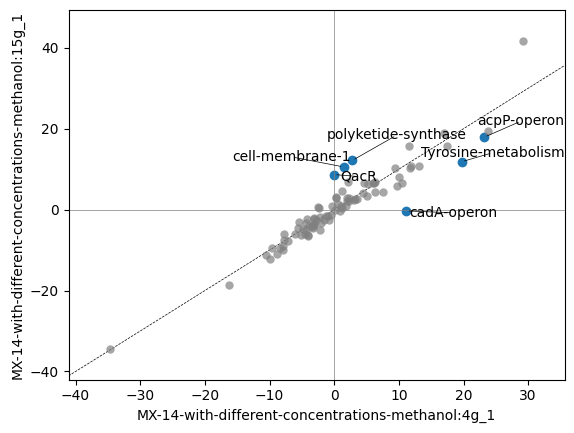

In [16]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="4g_1"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="15g_1"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"MX-14-with-different-concentrations-methanol:4g_1","MX-14-with-different-concentrations-methanol:15g_1",table=True,threshold=5)

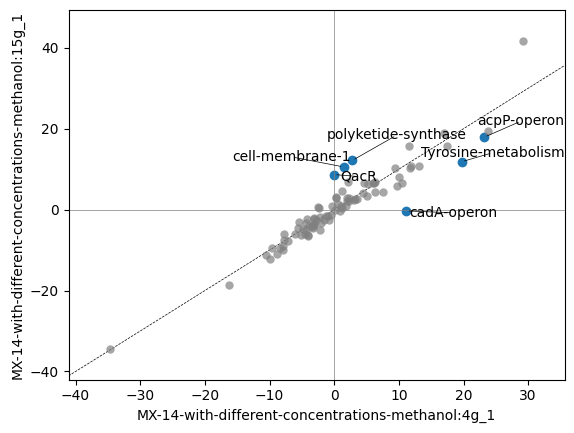

In [17]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="4g_1"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="15g_1"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"MX-14-with-different-concentrations-methanol:4g_1","MX-14-with-different-concentrations-methanol:15g_1",table=True,threshold=5)

In [18]:
imodulon_gene = {}
for index,row in ica_data.imodulon_table.iterrows():
    gene_table = []
    for index2,row2 in ica_data.view_imodulon(index).iterrows():
        gene_table.append(ica_data.view_imodulon(index).loc[index2,"gene_name"])
    imodulon_gene[index]=gene_table
print(len(imodulon_gene))

87


In [19]:
ica_data.view_imodulon("SufR")

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
WA5_RS07795,0.190451,sufS,NC_020519.1,WA5_1500,1648096,1649361,-,cysteine desulfurase,Amino acid transport and metabolism,H7C6A3,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07800,0.228565,sufC,NC_020519.1,WA5_1501,1649363,1650121,-,Fe-S cluster assembly ATPase SufC,"Post-translational modification, protein turno...",R0HW43,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07805,0.278019,sufD,NC_020519.1,WA5_1502,1650245,1651423,-,Fe-S cluster assembly protein SufD,"Post-translational modification, protein turno...",A0A516S8V1,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07810,0.278535,sufB,NC_020519.1,WA5_1503,1651429,1652874,-,Fe-S cluster assembly protein SufB,"Post-translational modification, protein turno...",NaN,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07815,0.264523,sufR,NC_020519.1,WA5_1504,1652890,1653576,-,transcriptional regulator,Transcription,A0A1B4WLI9,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07820,0.240989,mptB,NC_020519.1,WA5_1505,1653898,1655673,+,polyprenol phosphomannose-dependent alpha 1%2C...,Function unknown,NaN,Op971,WA5_RS01525
